### Import Required Libraries 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import math
import random
%matplotlib inline

### Import Required the Data Set

In [2]:
# Import the dataset
data = pd.read_csv('adult.data')
# The dataset doesn't have the column names. So add the column name header
data.columns = ["Age","Workclass","Final-Weight","Education","Education-num","Marital-status","Occupation","Relationship","Race","Sex","Capital-gain","Capital-loss","Hours-per-week","Native-country","Income"]
data.describe()

,Age,Final-Weight,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [3]:
# Check data sample
data.head()

,Age,Workclass,Final-Weight,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Identify the Types of Variables

The variable types are as follows:- <br>
Age:- Quantitative(numerical) - continuous - Ratio <br>
Workclass:- Qualitative(Categorical) - Nominal <br>
Final Weight: Quantitative(Numerical) - Continuous - Ratio <br>
Education:  Qualitative(Categorical) - Ordinal <br>
Education-num: Quantitative(numerical) - continuous - Ratio <br>
Marital-status: Qualitative(Categorical) - Nominal <br>
Occupation: Qualitative(Categorical) - Nominal <br>
Relationship: Qualitative(Categorical) - Nominal <br>
Race: Qualitative(Categorical) - Nominal <br>
Sex: Qualitative(Categorical) - Nominal <br>
Capital-gain: Quantitative(Numerical) - Continuous - Ratio <br>
Capital-loss: Quantitative(Numerical) - Continuous - Ratio <br>
Hours-per-week: Quantitative(Numerical) - Continuous - Ratio <br>
Native-country: Qualitative(Categorical) - Nominal <br>
Income[Target]:  Qualitative(Categorical) - Ordinal <br>

### Creation of a Dataframe with First and Last 20 Records

In [4]:
df = data.head(20).append(data.tail(20))

In [5]:
df

,Age,Workclass,Final-Weight,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


Here we can see that a dataframe with 40 records i.e from 0-19 and from 32540-32559 is created.

### Investigation of Presence of Correlation

In [25]:
data.corr()

,Age,Final-Weight,Education-num,Capital-gain,Capital-loss,Hours-per-week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Final-Weight,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education-num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital-gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital-loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours-per-week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


We can see that the highest correlation is between Education numer and hours followed by between Education num and Capital gain but even these values are nowhere close to 0.6 or 0.7 so the variables are not highly corelated and therefore we can't drop any of them.

### Bar Charts for Categorical Variables

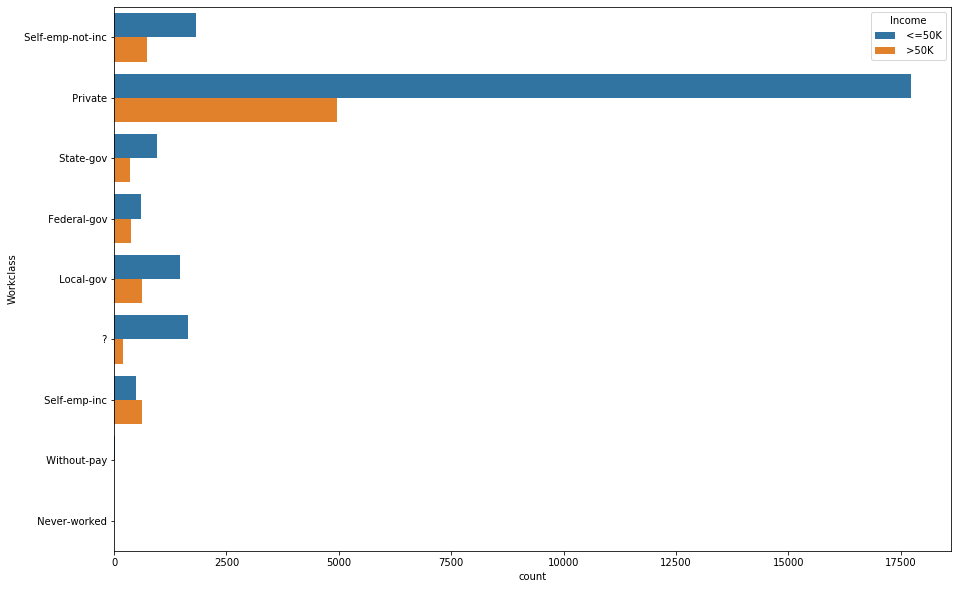

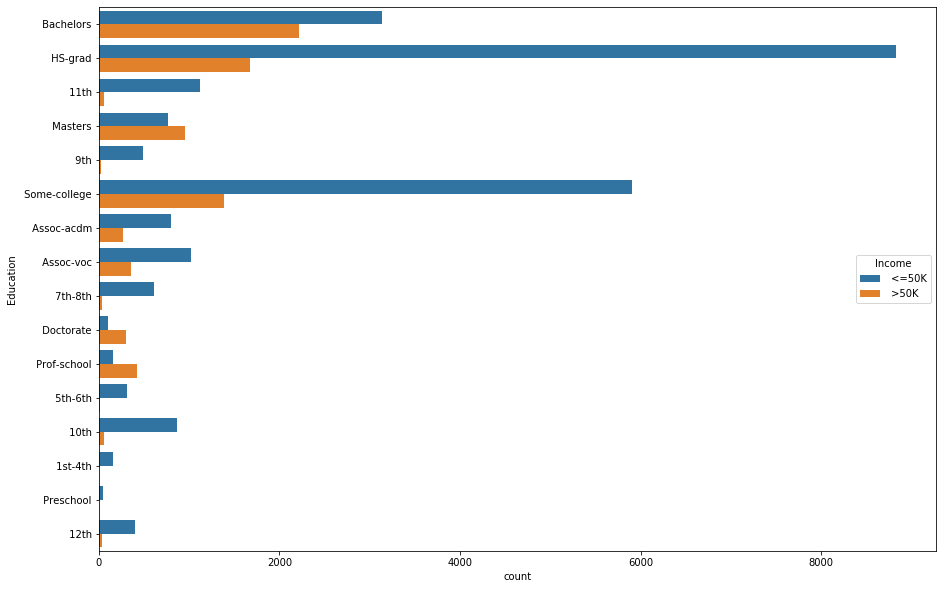

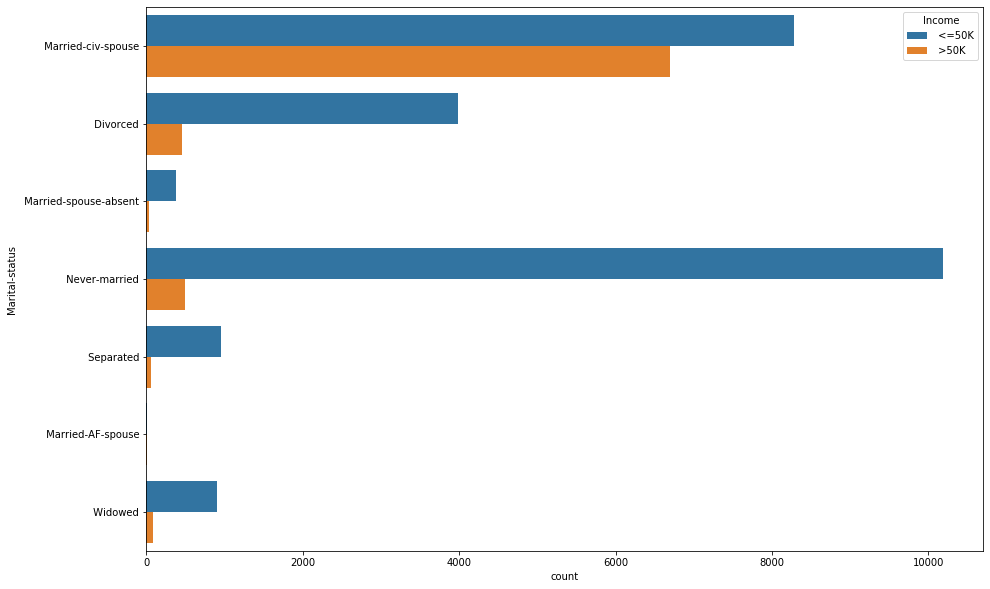

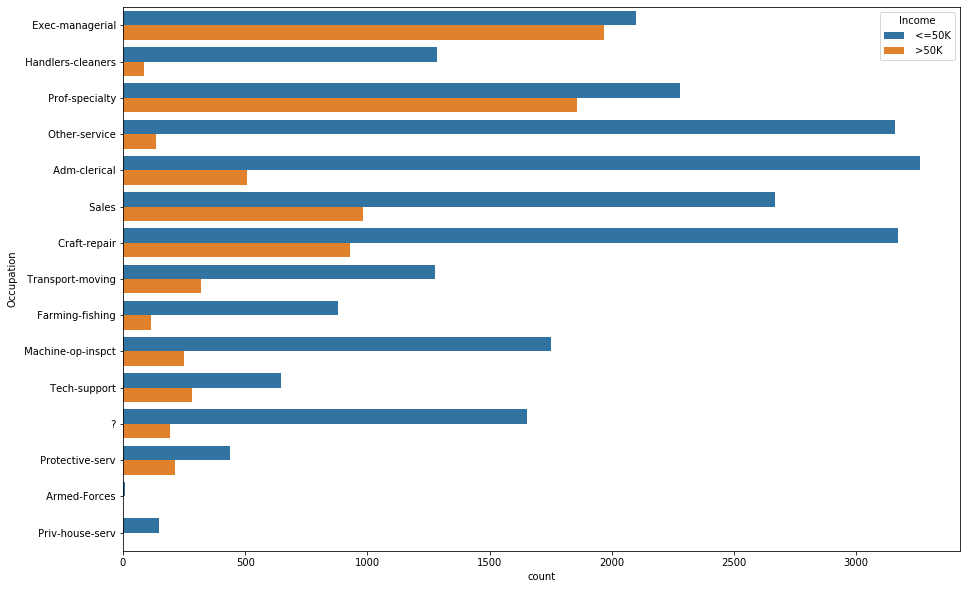

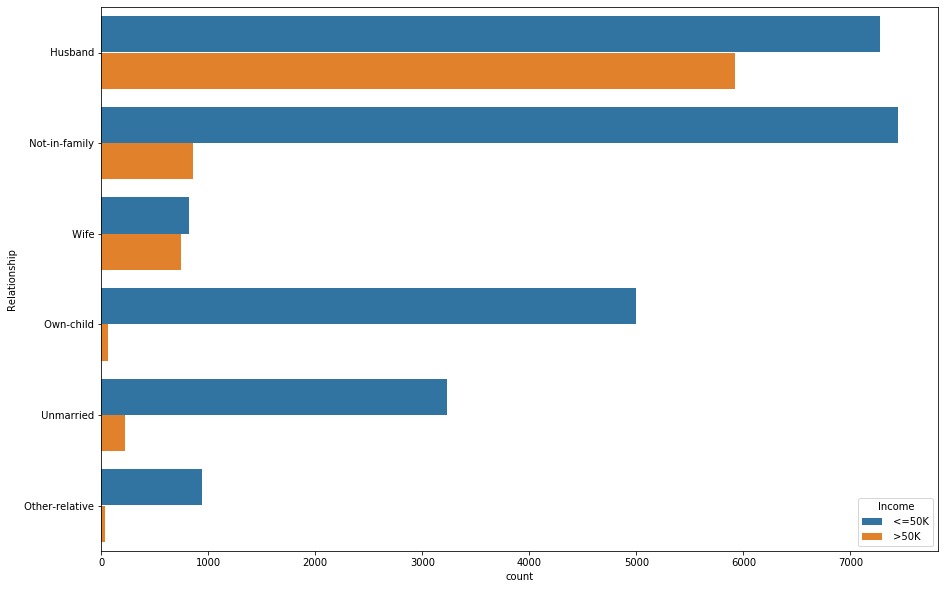

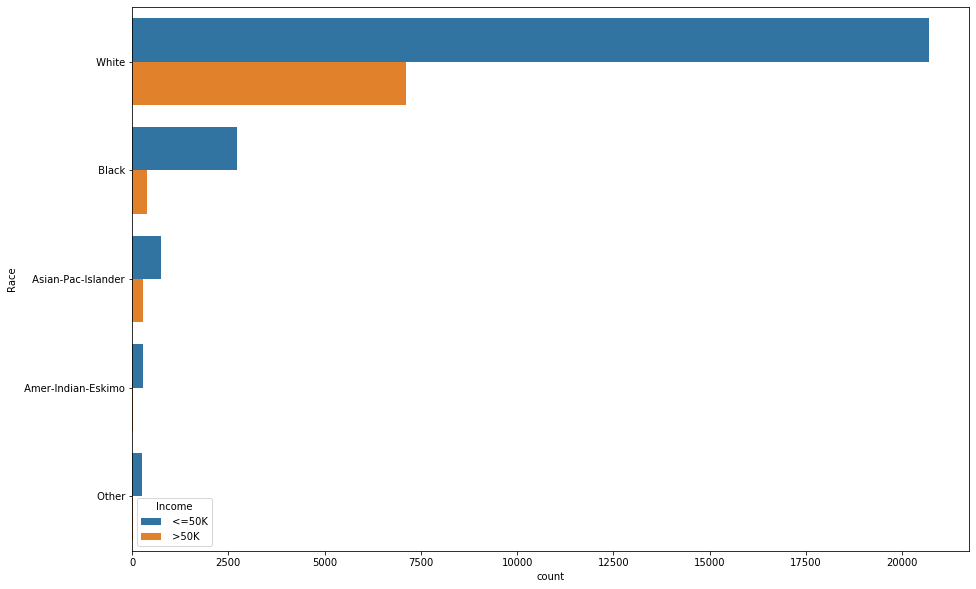

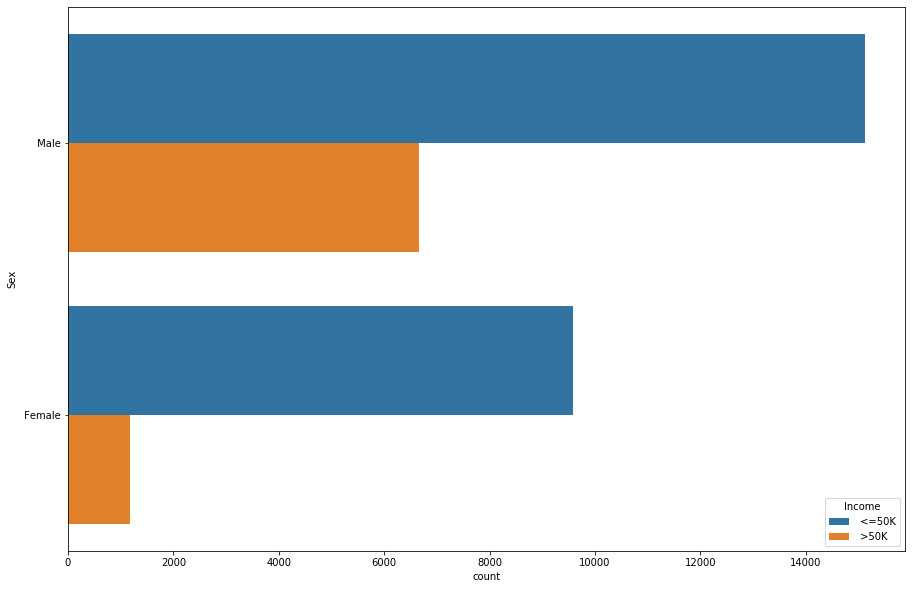

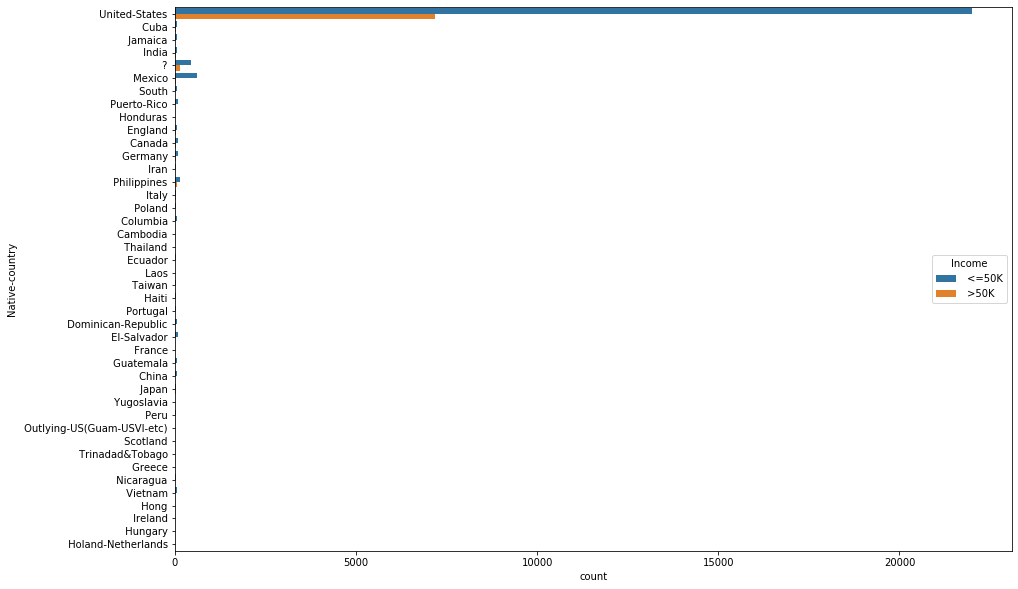

In [7]:
# First lets distribute the variables into two lists of categorical and numerical respectively

Cat_vars = ["Workclass","Education","Marital-status","Occupation","Relationship","Race","Sex","Native-country"]
Num_vars = ["Age","Final-Weight","Education-num","Capital-gain","Capital-loss","Hours-per-week"]

# Loop through the numerical variables and plot the histogram for each variable
for i in Cat_vars:
    plt.figure(figsize=(15, 10))
    sns.countplot(y = i, hue = "Income", data = data)
    plt.ylabel(i)
    plt.show() 

From the plots we can see that for each value of the working-class,Race and Native country variables,  the pattern of the values of the target variable is mostly similar. This indicates that the target variable is less dependent 
on these variables.

On the other hand as the value of the education,marital-status,relationship,occupation and sex variables change,
 the pattern of the values of the target variable changes dramatically. This indicates that the target variable is more 
dependent on these variables

The independent variables on which the dependent variable hahigh dependency will play a significant role. 

Some other significant details we observe here are :-<br>
In the workclass plot, Private field has a considerably different distribution from the other values in the variable with respect to the Income <br>
Similarly married-civ-spouse also has a very different distribution with respect to Income.

### Cross Tabulation of Categorical Variable Pairs

In [29]:
for m in range(len(Cat_vars)):
    for n in range(m+1,len(Cat_vars)):
        x = pd.crosstab(data[Cat_vars[m]],data[Cat_vars[n]])
        print(x)
            

Education           10th   11th   12th   1st-4th   5th-6th   7th-8th   9th  \
Workclass                                                                    
 ?                   100    118     40        12        30        72    51   
 Federal-gov           6      9      5         0         1         2     3   
 Local-gov            31     36     19         4         9        28    23   
 Never-worked          2      1      0         0         0         1     0   
 Private             695    923    333       136       266       424   387   
 Self-emp-inc         19     14      7         2         4        14    10   
 Self-emp-not-inc     67     60     19        13        19        94    34   
 State-gov            13     14     10         1         4        10     6   
 Without-pay           0      0      0         0         0         1     0   

Education           Assoc-acdm   Assoc-voc   Bachelors   Doctorate   HS-grad  \
Workclass                                                    

Race            Amer-Indian-Eskimo   Asian-Pac-Islander   Black   Other  \
Education                                                                 
 10th                           16                   13     133       9   
 11th                           14                   21     153      10   
 12th                            5                    9      70      14   
 1st-4th                         4                    5      16       9   
 5th-6th                         2                   18      21      13   
 7th-8th                         9                   11      56      17   
 9th                             5                    9      89       8   
 Assoc-acdm                      8                   29     107       8   
 Assoc-voc                      19                   38     112       6   
 Bachelors                      21                  289     330      33   
 Doctorate                       3                   28      11       2   
 HS-grad                 

Race                 Amer-Indian-Eskimo   Asian-Pac-Islander   Black   Other  \
Occupation                                                                     
 ?                                   25                   65     215      23   
 Adm-clerical                        31                  139     490      26   
 Armed-Forces                         1                    0       1       0   
 Craft-repair                        44                   89     244      28   
 Exec-managerial                     30                  135     244      11   
 Farming-fishing                     10                   16      42      11   
 Handlers-cleaners                   22                   23     179      12   
 Machine-op-inspct                   19                   59     274      39   
 Other-service                       33                  128     571      40   
 Priv-house-serv                      0                    4      28       3   
 Prof-specialty                      33 

Here we see that the highest density in most of the tables with workclass fall in the category of private. 
So the category of private may be a broad term for multiple classes, more information here may help us get a better understanding.

Another thing to observe is that in the Occupation X Workclass table, the frequency in the unknown occupation vs the unknown
workclass is high, so it may be better to replace them with modal values than disregarding those values.

### Anomalous  Fields

There are missing fields in the Occupation, Workclass and Native Country variables. Since these are all nominal qualitative variables, 
the anomalies can be replaced by the modal value or the records vcan be dropped. 

### Statistic Report

In [9]:
data.describe()

,Age,Final-Weight,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Here the <b>count, mean, std, min</b> and <b>max</b> show 
the <b>number of values, average value, the standard deviation, minimum value</b> and <b>maximum value</b> of each column respectively
<b>25%, 50%,75%</b> show the <b>25th percentile(1st quartile), 50th percentile(median/2nd quaritle)</b> and the <b>75th percentile(3rd quartile)</b> respectively
This means that <b>25%</b> of the values in age column are <b> 28, 50% </b> are <b> 37</b> etc.

### Histograms of each Numerical Variable

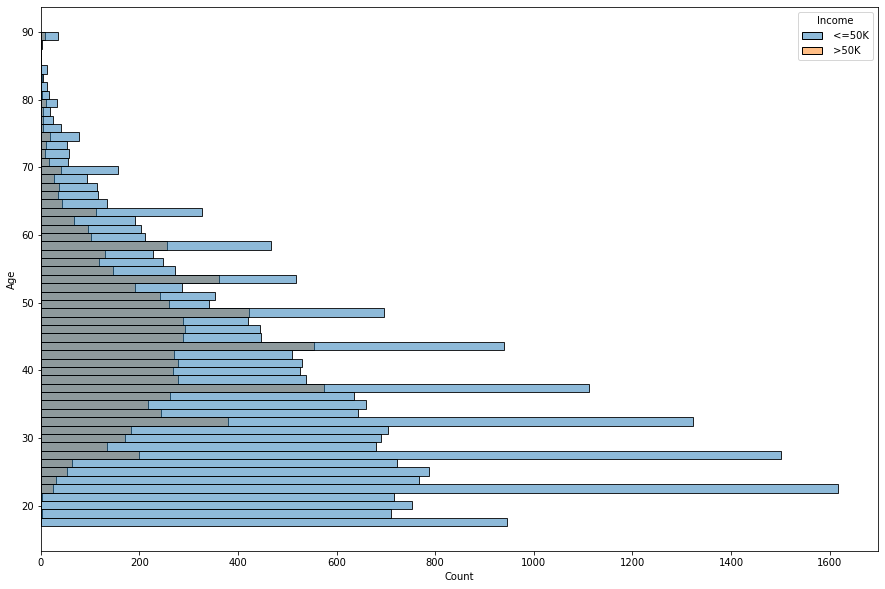

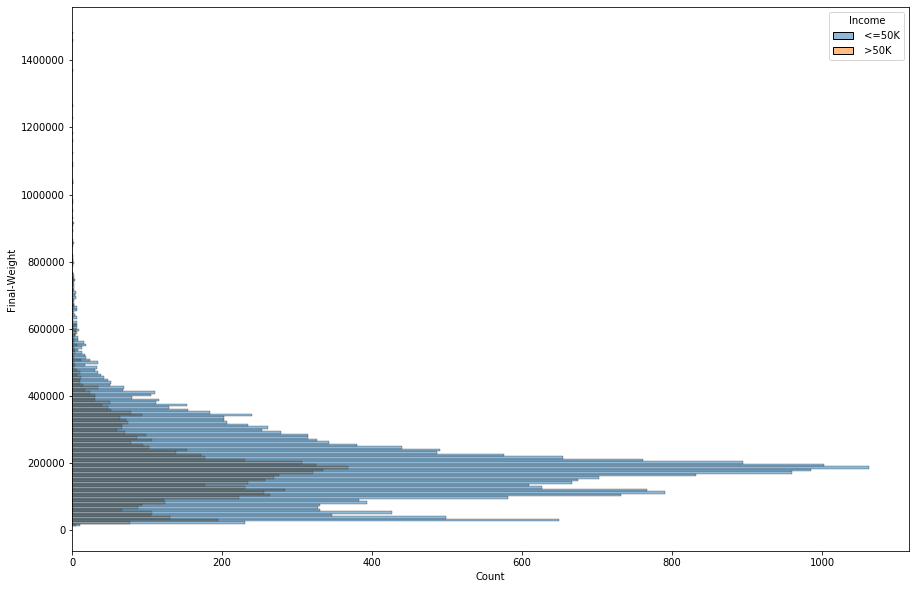

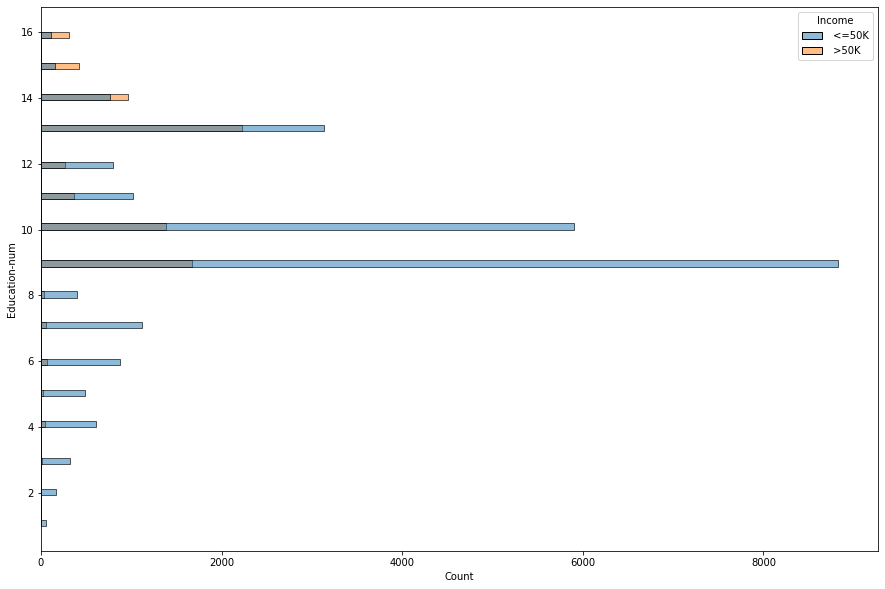

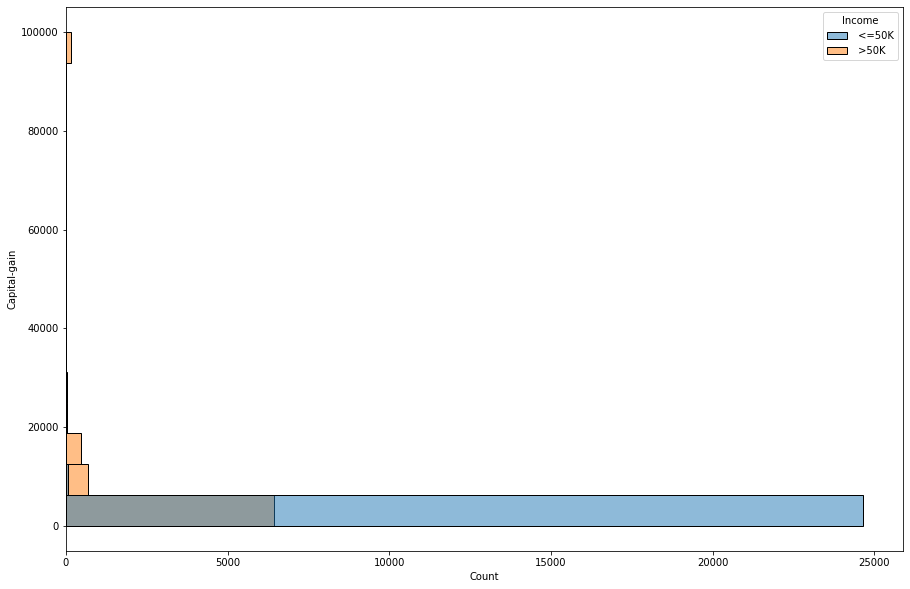

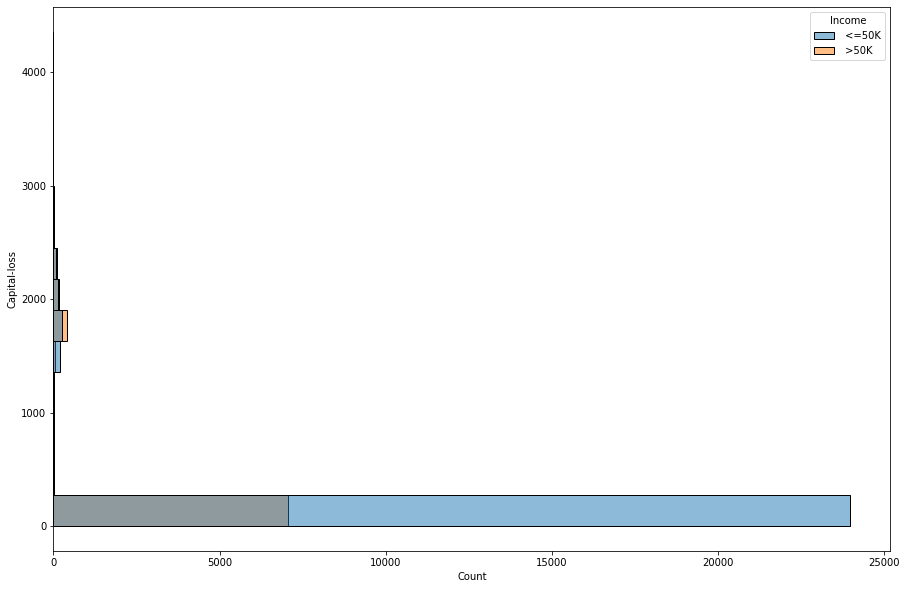

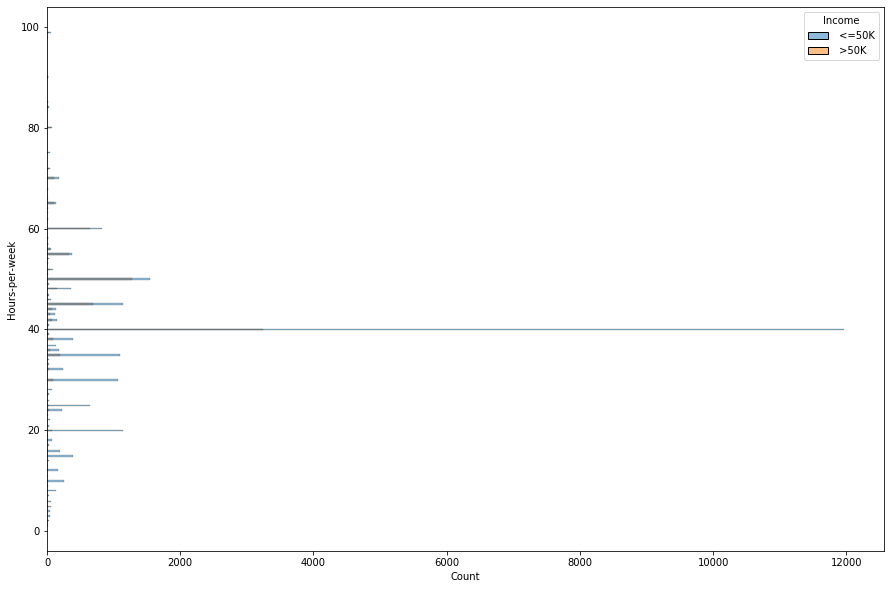

In [10]:
# Loop through the numerical variables and plot the histogram for each variable
for i in Num_vars:
    plt.figure(figsize=(15, 10))
    sns.histplot(y = i, hue = "Income", data = data)
    plt.show() 

From the histograms we can see that for each value of the age and final weight variables, the pattern of the values of the target variable is mostly similar. This indicates that the target variable is less dependent on these variables.

On the other hand as the value of the education number,capital gian and hours per week variables change, the pattern of values of the target variable changes dramatically. This indicates that the target variable is more dependent on these variables

The age group of < 30 has a very different distribution compared to the rest with respect to the income. That's worth considering.

The independent variables on which the dependent variable has high dependency will play a significant role. 

### Scatter Plots of Numerical Variable Pairs

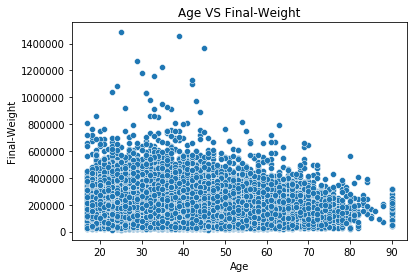

E:\Software\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


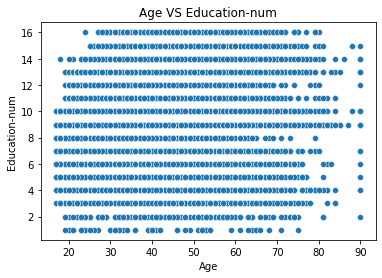

E:\Software\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


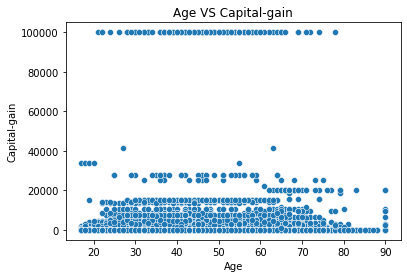

E:\Software\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


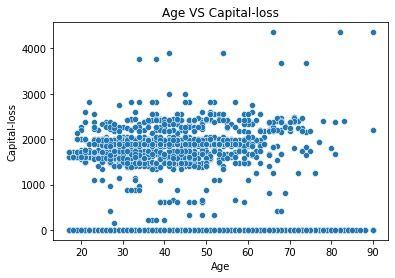

E:\Software\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


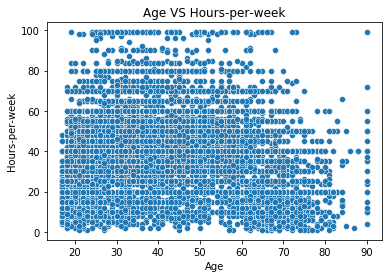

E:\Software\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


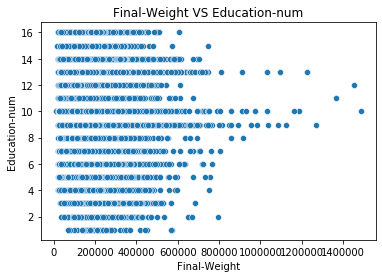

E:\Software\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


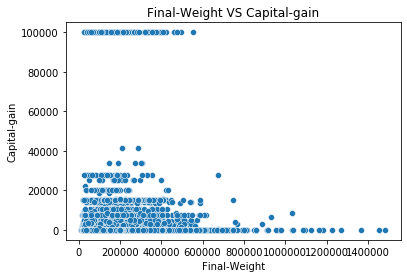

E:\Software\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


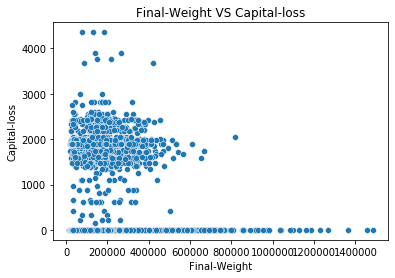

E:\Software\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


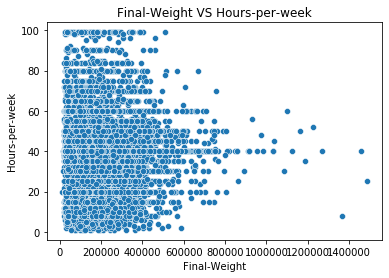

E:\Software\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


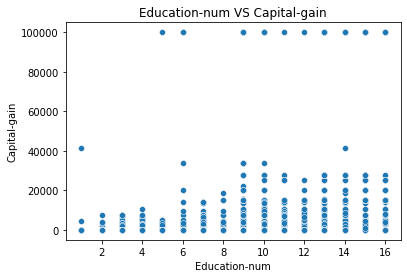

E:\Software\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


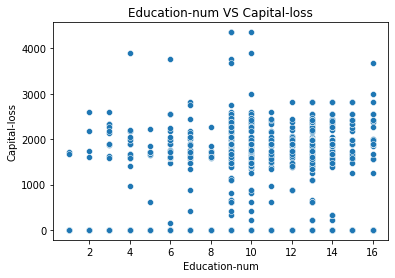

E:\Software\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


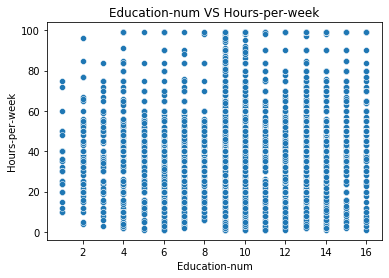

E:\Software\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


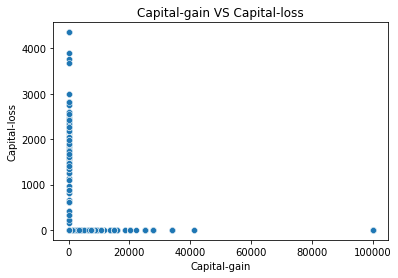

E:\Software\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


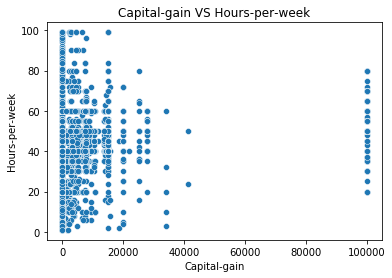

E:\Software\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


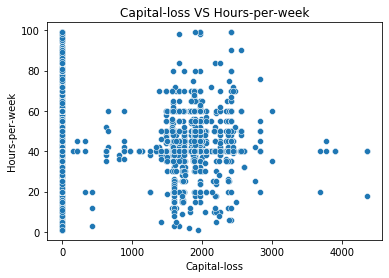

In [21]:
for m in range(len(Num_vars)):
    for n in range(m+1,len(Num_vars)):
        x = sns.scatterplot(data[Num_vars[m]],data[Num_vars[n]])
        x.set_title(Num_vars[m] + ' VS ' + Num_vars[n])
        plt.xlabel(Num_vars[m])
        plt.ylabel(Num_vars[n])
        plt.show()
            

### Interesting Subgroups of Records

Some of the interesting Subgroups are the ones with the workclass value as private and marital status as married-civ-spouse and the age group under 30.
These three subgroups of the records seem particularly contributive to the variation in the income bracket. These would be worth further investigation. 

### Summary

There is some missing data in the columns of workclass, occupation and native country.
It would be better to replace the values with modal values than to drop the corresponding records specially for the ones corresponding to the workclass and occupation since their frequency is high.<br>
The field Private in the workclass variable has a very high frequency. More information should be collected to see if this field encompasses multiple workclasses, if so, it could be divided into multiple fields to get a more accurate picture.<br>
Some of the field values are playing a more important role. These should be further looked into as they may provide vital information.
